/home/ma-user/anaconda3/envs/Mindquantum-0.9.0/lib/python3.9/site-packages/mindquantum/simulator/__init__.py:17: UserWarning: Disable mqvector gpu backend due to: Malloc GPU memory failed: cudaErrorInsufficientDriver, CUDA driver version is insufficient for CUDA runtime version
  from .available_simulator import SUPPORTED_SIMULATOR


(-0.1488793832242376+0.20083557765189572j)¦0000⟩
(0.22532190051498985-0.10830531449708757j)¦0001⟩
(0.1684920374520209-0.18469010075060016j)¦0010⟩
(0.13671060328122459-0.20930888884728155j)¦0011⟩
(-0.24117490157873922-0.0658381868559995j)¦0100⟩
(0.18269731858678068+0.17065078312507206j)¦0101⟩
(-0.16426581234726556-0.18845886260373368j)¦0110⟩
(-0.19234904333771072-0.15969297269156055j)¦0111⟩
(0.007153564623692529+0.24989763206796237j)¦1000⟩
(0.11013602355447409-0.22443274341238256j)¦1001⟩
(0.0182435678027581-0.24933345590559283j)¦1010⟩
(-0.021956613542037443-0.24903394772955284j)¦1011⟩
(-0.07813751879394622-0.23747532115301107j)¦1100⟩
(-0.04154299719333165+0.2465241963463118j)¦1101⟩
(0.06656419730627741-0.2409755332745858j)¦1110⟩
(0.027078917178778555-0.24852913761654766j)¦1111⟩


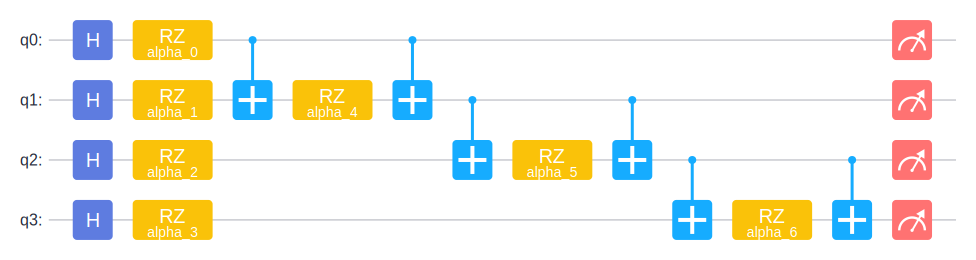

shots: 10000
Keys: q3 q2 q1 q0│0.00   0.017       0.033        0.05       0.067       0.083
─────────────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
             0000│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             0001│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             0010│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             0011│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             0100│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             0101│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             0110│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             0111│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
                 │
             1000│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
                 │
             1001│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
               

In [1]:
from mindquantum.core.circuit import shift, add_suffix, Circuit, UN
from mindquantum.core.gates import RZ, X, H, Measure, BarrierGate, BARRIER
from IPython.display import display_svg
from mindquantum.simulator import Simulator 
import numpy as np   

# TODO: 请根据图中所示构建量子线路
circ = Circuit()  #初始化量子线路
template = Circuit([X.on(1, 0), RZ('alpha').on(1), X.on(1, 0)])   #将X,RZ,X三个量子门组合成一个template
circ = (UN(H, 4) + (RZ(f'alpha_{i}').on(i) for i in range(4)) + sum(add_suffix(shift(template, i), f'{i+4}') for i in range(3))+ BarrierGate(False))  
#UN(H, 4) 是生成均匀叠加态，即对所有量子比特作用H门，(RZ(f'alpha_{i}').on(i) for i in range(4))是4个含参数的RZ门，sum(add_suffix(shift(template, i), f'{i+4}') for
#i in range(3))是添加三个template,BarrierGate(False)是添加barrier将线路对齐,False是指不打印出BarrierGate
#沿Z轴转动的角度alpha都是随机的：  
alpha = [np.random.rand() * 2 * np.pi for _ in range(7)] 
    
# TODO: 使用模拟器运行线路，打印运行后的量子态
sim = Simulator("mqvector", circ.n_qubits) # 创建模拟器，backend使用‘projectq’，能模拟4个比特（'circ'线路中包含的比特数）
sim.apply_circuit(circ, {'alpha_0': alpha[0], 'alpha_1': alpha[1], 'alpha_2': alpha[2],'alpha_3': alpha[3],'alpha_4': alpha[4],'alpha_5': alpha[5],'alpha_6': alpha[6]})  
#作用一个量子线路circ，当线路是一个参数化量子线路时，我们还需要提供参数值。
print(sim.get_qs(True)) #打印运行后的量子态,每个本征态的系数的模平方是1/16

circ.measure_all() #对量子线路中所有量子比特添加测量
display_svg(circ.svg()) #绘制SVG格式的量子线路图片

# TODO: 使用模拟器采样线路结果10000次
sim = Simulator('mqvector', circ.n_qubits)
res = sim.sampling(circ, {'alpha_0': 1.1, 'alpha_1': 2.6, 'alpha_2': 1.2,'alpha_3': 0.2,'alpha_4': 2,'alpha_5': 0.6,'alpha_6': 2.4}, shots=10000) #对量子线路进行10000次采样
print(res) #打印结果